<a href="https://colab.research.google.com/github/pedropberger/code-misc/blob/main/NLP_MPES_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP MPES PI

Roadmap

- Import data
- ETL
- Html clean
- Token
- Embedding
- Relation matrix

# Upload and Clean Data

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Access the directory and import data
import pandas as pd

# Assuming your data file is a CSV file, change the format accordingly if it's different
file_path = '/content/drive/My Drive/Colab Notebooks/Data/NLP_PI_Beta'

# Load the data into a DataFrame

db_full =  pd.read_parquet(file_path)

# Now you can work with the data
print(db_full.head())  # Display the first few rows of the data


# Fase 2 - Cleaning HTML

import os
from bs4 import BeautifulSoup

def extract_text_from_html(html):
    soup = BeautifulSoup(html, 'html.parser')

    # Add space between words (after we will remove then in the tokenization fase)
    text_with_spaces = ' '.join(soup.stripped_strings)

    return text_with_spaces

# Aplicando a função à coluna 'conteudo_html'
db_full['conteudo_text'] = db_full['conteudo_html'].apply(extract_text_from_html)

# Exibindo o DataFrame resultante
print(db_full.head())

print('Dropando a coluna "conteudo_html"')
db_full.drop('conteudo_html', axis=1, inplace=True)

db_full.head()

Mounted at /content/drive
    IdAuto          Numero  IdTipoAuto  id_tipo_documento  \
0  3165243  20230000118398         2.0                 17   
1  3165533  20230000147307         2.0                 17   
2  3165920  20230000186102        15.0                 17   
3  3166481  20230000242268         5.0                 17   
4  3164456  20230000039664         2.0                 17   

              TituloDoc                                      conteudo_html  
0                  None  <p style="text-align: center;"><img src="data:...  
1                  None  <p style="text-align: center;"><img src="data:...  
2                  None  <p style="text-align: center;"><img src="data:...  
3  - Ação Civil Pública  <p style="text-align: center;"><img src="data:...  
4       Petição Inicial  <p style="text-align: center;"><img src="data:...  


# Tokenizer

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import os
import nltk

# Downloading packs

nltk.download('stopwords')
nltk.download('punkt')

# Função para tokenizar o texto removendo stopwords
def tokenize_text(text):
    tokens = word_tokenize(text.lower())  # Tokenização e conversão para minúsculas
    tokens = [token for token in tokens if token.isalpha()]  # Remover pontuações e números
    stop_words = set(stopwords.words('portuguese'))
    tokens = [token for token in tokens if token not in stop_words]  # Remover stopwords
    return tokens

#Importação dos dados
db_full =  pd.read_parquet('NPL_clean_html')

# Aplicar a função de tokenização à coluna de texto
db_full['conteudo_text'] = db_full['conteudo_text'].apply(tokenize_text)

# Exibir o DataFrame resultante
db_full.head()

In [5]:
db_full.head()

,IdAuto,Numero,IdTipoAuto,id_tipo_documento,TituloDoc,conteudo_text
0,3165243,20230000118398,2.0,17,None,"[ministério, público, estado, espírito, santo,..."
1,3165533,20230000147307,2.0,17,None,"[ministério, público, estado, espírito, santo,..."
2,3165920,20230000186102,15.0,17,None,"[ministério, público, estado, espírito, santo,..."
3,3166481,20230000242268,5.0,17,- Ação Civil Pública,"[ministério, público, estado, espírito, santo,..."
4,3164456,20230000039664,2.0,17,Petição Inicial,"[ministério, público, estado, espírito, santo,..."


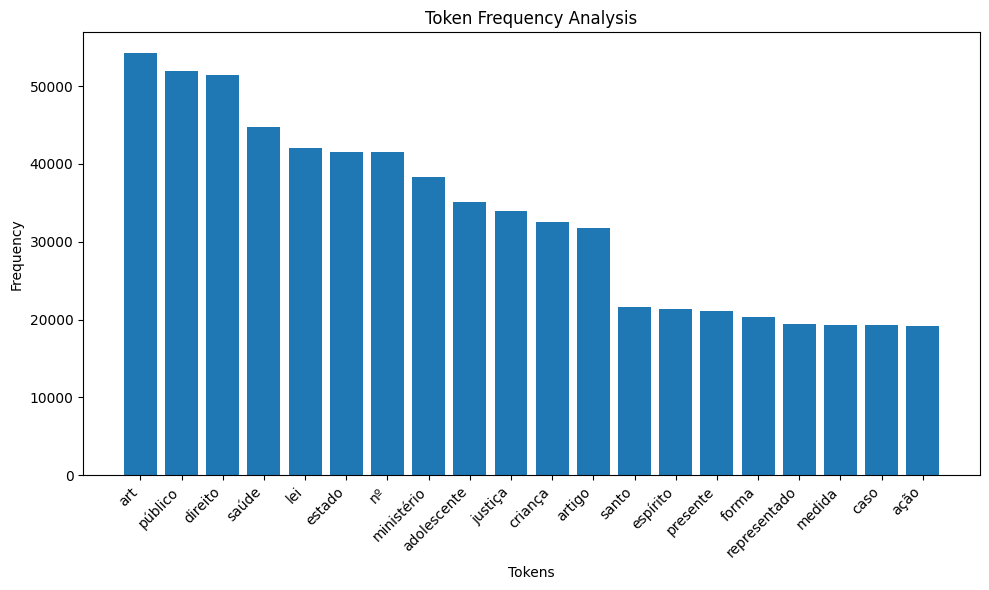

[('art', 54205), ('público', 51958), ('direito', 51410), ('saúde', 44715), ('lei', 42062), ('estado', 41580), ('nº', 41501), ('ministério', 38285), ('adolescente', 35173), ('justiça', 33974), ('criança', 32595), ('artigo', 31794), ('santo', 21654), ('espírito', 21349), ('presente', 21106), ('forma', 20273), ('representado', 19484), ('medida', 19356), ('caso', 19326), ('ação', 19221), ('proteção', 18516), ('direitos', 18085), ('conforme', 17524), ('ii', 16974), ('termos', 16618), ('tratamento', 16047), ('pública', 15842), ('tutela', 15638), ('constituição', 15516), ('i', 15501), ('civil', 15424), ('medidas', 15142), ('federal', 14514), ('poder', 14491), ('pessoa', 14057), ('promotor', 14043), ('sendo', 13848), ('estatuto', 13540), ('internação', 13509), ('autos', 13466), ('fatos', 13243), ('bem', 13226), ('processo', 13134), ('assim', 12966), ('vida', 12718), ('situação', 12631), ('iii', 12556), ('familiar', 12443), ('penal', 12296), ('todos', 12143), ('ainda', 12100), ('família', 12042

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

# Tokenize the text (assuming it's already tokenized, otherwise you can use NLTK or SpaCy for tokenization)
tokens = [token for sublist in db_full['conteudo_text'] for token in sublist]

# Count the frequency of each token
token_freq = Counter(tokens)

# Visualize the token frequencies (optional)
most_common_tokens = token_freq.most_common(20)  # Select the 20 most common tokens
tokens, frequencies = zip(*most_common_tokens)  # Unpack tokens and frequencies
most_common_tokens2 = token_freq.most_common(100)

plt.figure(figsize=(10, 6))
plt.bar(tokens, frequencies)
plt.xlabel('Tokens')
plt.ylabel('Frequency')
plt.title('Token Frequency Analysis')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(most_common_tokens2)